  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  5  125k    5  7451    0     0   7451      0  0:00:17  0:00:01  0:00:16  6530
100  125k  100  125k    0     0   125k      0  0:00:01  0:00:01 --:--:-- 89349


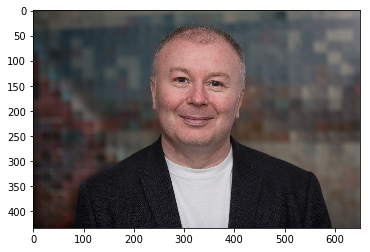

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import skimage.color as sc

!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/graeme2.jpg -o img.jpg
i = np.array(Image.open('img.jpg'))
imshow(i)

In [2]:
i.dtype #unsigned integer of values btwn 0 and 255, so images are array of numberic values, distribution of numbers tells u about
#colors, shades of an object or image

dtype('uint8')

In [3]:
i.shape

(433, 650, 3)

(433, 650)

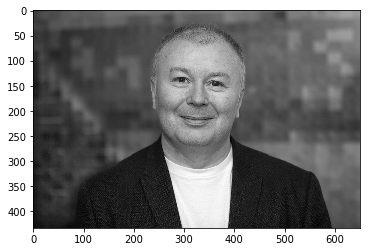

In [4]:
i_mono=sc.rgb2gray(i)
imshow(i_mono, cmap='gray')
i_mono.shape

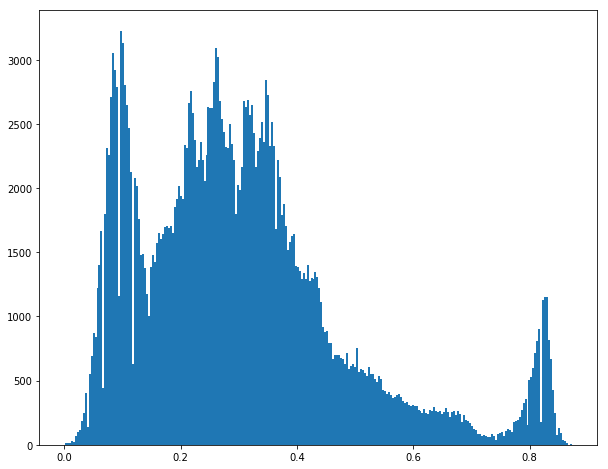

In [5]:
def im_hist(img):
    fig=plt.figure(figsize=(10,8))
    fig.clf()
    ax=fig.gca()
    ax.hist(img.flatten(), bins=256)
    plt.show()
im_hist(i_mono)

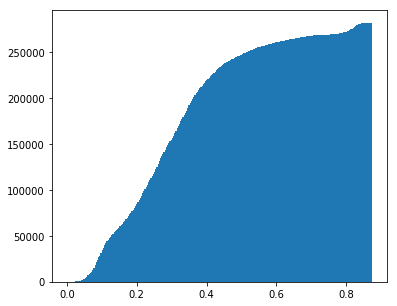

In [6]:
def im_cdf(img):
    fig=plt.figure(figsize=(6,5))
    fig.clf()
    ax=fig.gca()
    ax.hist(img.flatten(), bins=256,cumulative=True)
    plt.show()
im_cdf(i_mono)  #plot shows unevenly distributed contrast, a perfect distr-n would be straight line

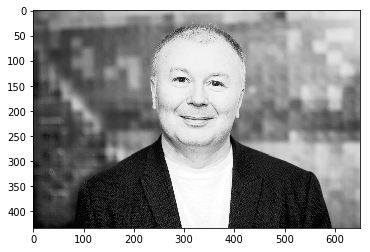

In [7]:
#normalizing color and dsitribution
from skimage import exposure
i_eq=exposure.equalize_hist(i_mono)
imshow(i_eq, cmap='gray')


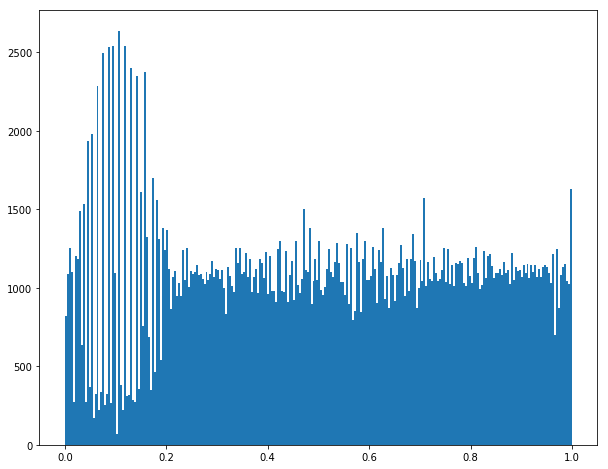

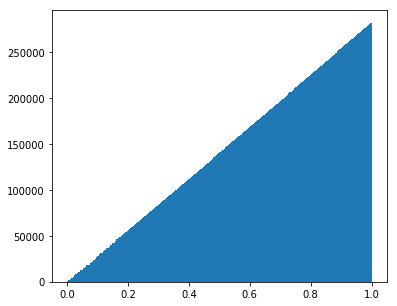

In [8]:
im_hist(i_eq) # hist shows still some spikes, but much more equalized distribution of intensity, so cdf displays
im_cdf(i_eq)

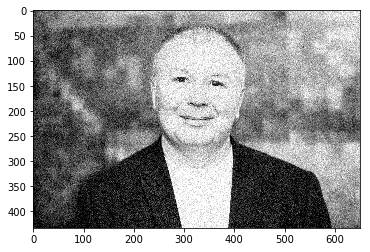

In [9]:
#denoizing and filtering
import skimage
i_n=skimage.util.random_noise(i_eq)
imshow(i_n,cmap='gray')

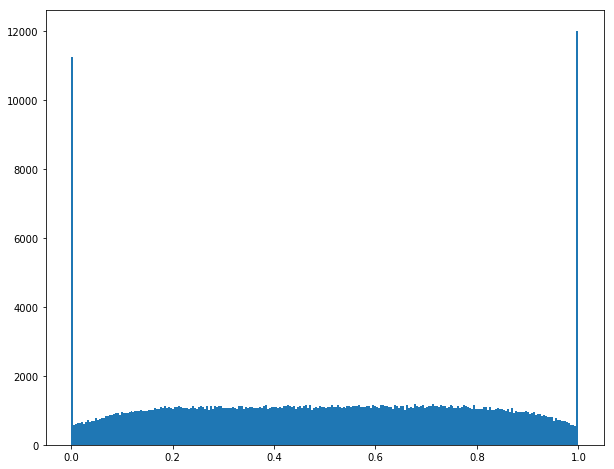

In [10]:
im_hist(i_n)

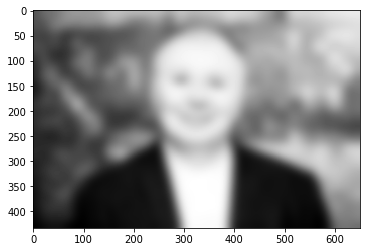

In [11]:
#gaussian filter
def gaa(im,sigma=10):
    from scipy.ndimage.filters import gaussian_filter as gf
    import numpy as np
    return gf(im, sigma=sigma)
i_g=gaa(i_n)
imshow(i_g, cmap='gray')

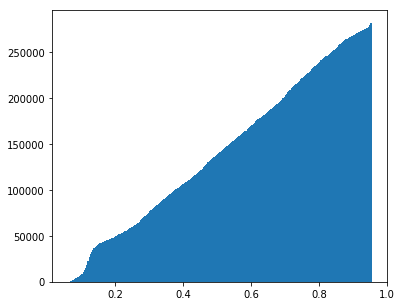

In [12]:
im_cdf(i_g)

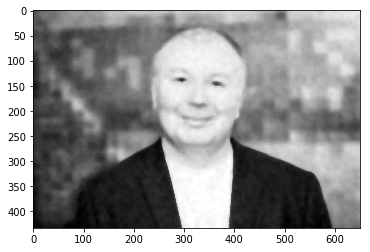

In [13]:
#median filter
def mf(im,size=10):
    from scipy.ndimage.filters import median_filter as m
    import numpy as np
    return m(im, size=size)
i_m=mf(i_n)
imshow(i_m, cmap='gray')

# Edge detection
>> use graidents to find contrast and pixel intensity by applying mask hor-vertically


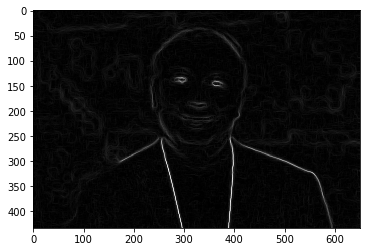

In [14]:
def im_sob(im):
    from scipy import ndimage
    im=sc.rgb2gray(im)
    dx=ndimage.sobel(im,1)
    dy=ndimage.sobel(im,0)
    mag=np.hypot(dx,dy)
    mag*=255.0/np.amax(mag)
    mag=mag.astype(np.uint8)
    return mag

ed=im_sob(i_m)
imshow(ed,cmap='gray')

# Corner detection
>> corner detection uses detection of intensity in any direction, comparing each time pixel intensity


'Done'

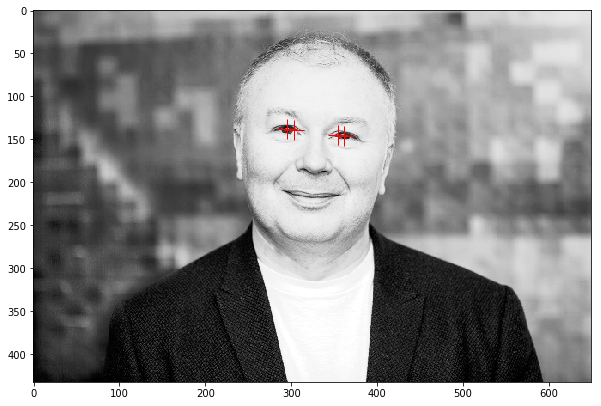

In [15]:
def cor(im, min_distance=5):
    from skimage.feature import corner_harris, corner_peaks
    mag=corner_harris(im)
    
    return corner_peaks(mag,min_distance=min_distance)

harris=cor(i_eq,5)

def pl(im,harris, markersize=20, color='red'):
    fig=plt.figure(figsize=(10,8))
    fig.clf()
    ax=fig.gca()
    ax.imshow(np.array(im).astype(float),cmap='gray')
    ax.plot(harris[:,1],harris[:,0],'r+',color=color,markersize=markersize)
    return 'Done'

pl(i_eq,harris)



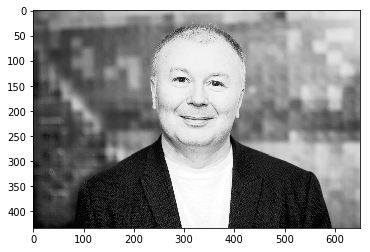

In [16]:
imshow(i_eq,cmap='gray')

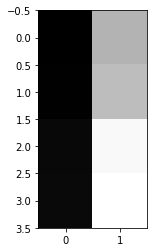

In [17]:
imshow(harris,cmap='gray')

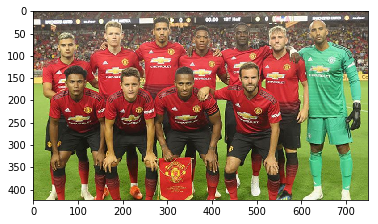

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visiulazation
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#image processing
import cv2

#extracting zippped file
import tarfile
from PIL import Image
#systems
i = np.array(Image.open('d:/mufc2.jpg'))
imshow(i)

import os
#print(os.listdir("D:/mufc2.jpg"))
#print(os.listdir("../input/lfwpeople"))

In [21]:
import cv2                
import matplotlib.pyplot as plt 
def face_detection(img):
    face_cascade = cv2.CascadeClassifier('C:/Users/pc-user/Anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_alt.xml')
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    print('Number of faces detected from IMAGES:', len(faces))
        
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,8))
    plt.imshow(cv_rgb)
    plt.show()
    



Number of faces detected from IMAGES: 11


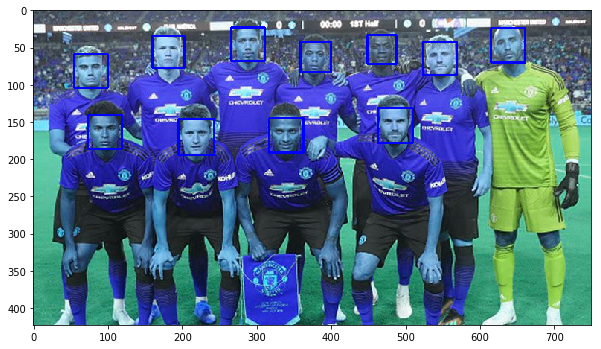

In [24]:
face_detection(i)